NAMA: FERNALDY FERDINAND

NIM: 2602068605

KELAS: LA09

LINK Video: https://binusianorg-my.sharepoint.com/personal/fernaldy_ferdinand_binus_ac_id/_layouts/15/guestaccess.aspx?share=EuSCqIpSbxBInIQn3spClVwB4ANxiEKtEUsWJE6mv6Sklw&e=MYzrh7

In [ ]:
Nimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
# Load dataset
data = pd.read_csv('data_1A.csv')

In [ ]:
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,28,admin.,single,university.degree,no,yes,no,telephone,may,fri,1128.0,3,999,0,nonexistent,no
1,1,30,admin.,single,university.degree,no,no,no,cellular,may,thu,199.0,1,999,0,nonexistent,no
2,2,49,self-employed,divorced,university.degree,no,yes,no,cellular,jul,wed,1124.0,2,999,0,nonexistent,yes
3,3,33,management,married,high.school,no,yes,no,telephone,may,fri,178.0,2,999,0,nonexistent,no
4,4,50,services,married,unknown,unknown,no,no,telephone,may,tue,144.0,1,999,0,nonexistent,no


In [ ]:
data.isna().sum()

Unnamed: 0     0
age            0
job            7
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8221 entries, 0 to 8236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8221 non-null   int64  
 1   job          8221 non-null   object 
 2   marital      8221 non-null   object 
 3   education    8221 non-null   object 
 4   default      8221 non-null   object 
 5   housing      8221 non-null   object 
 6   loan         8221 non-null   object 
 7   contact      8221 non-null   object 
 8   month        8221 non-null   object 
 9   day_of_week  8221 non-null   object 
 10  duration     8221 non-null   float64
 11  campaign     8221 non-null   int64  
 12  pdays        8221 non-null   int64  
 13  previous     8221 non-null   int64  
 14  poutcome     8221 non-null   object 
 15  y            8221 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.1+ MB


Visualisasi Data Kategori

In [ ]:
Kolom_Kategori = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

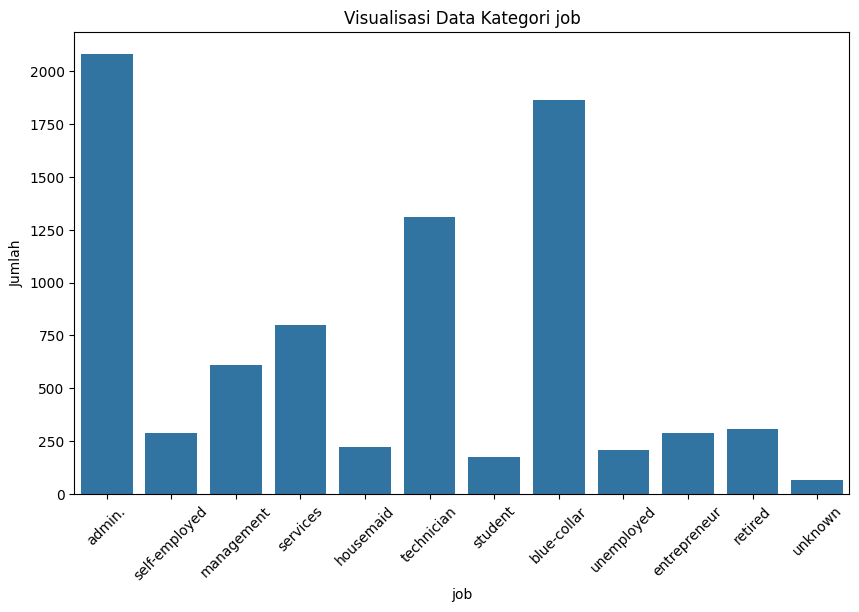

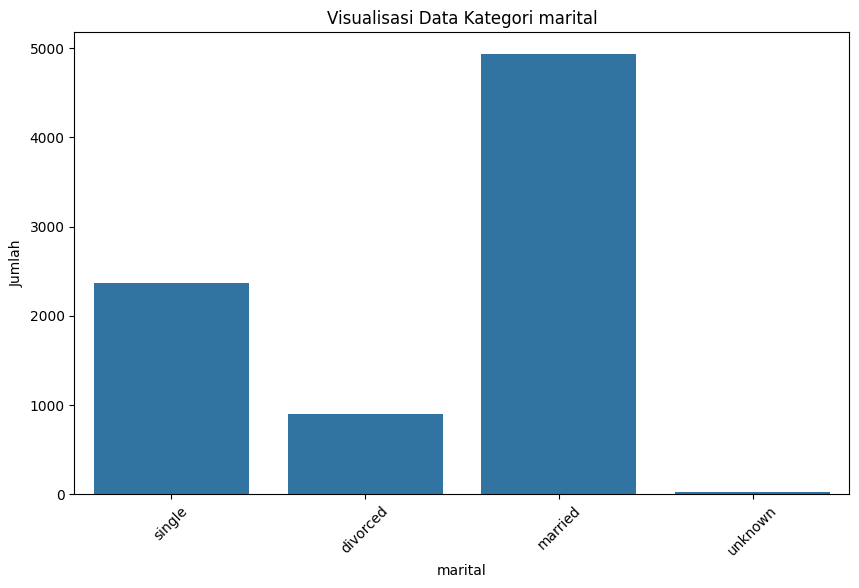

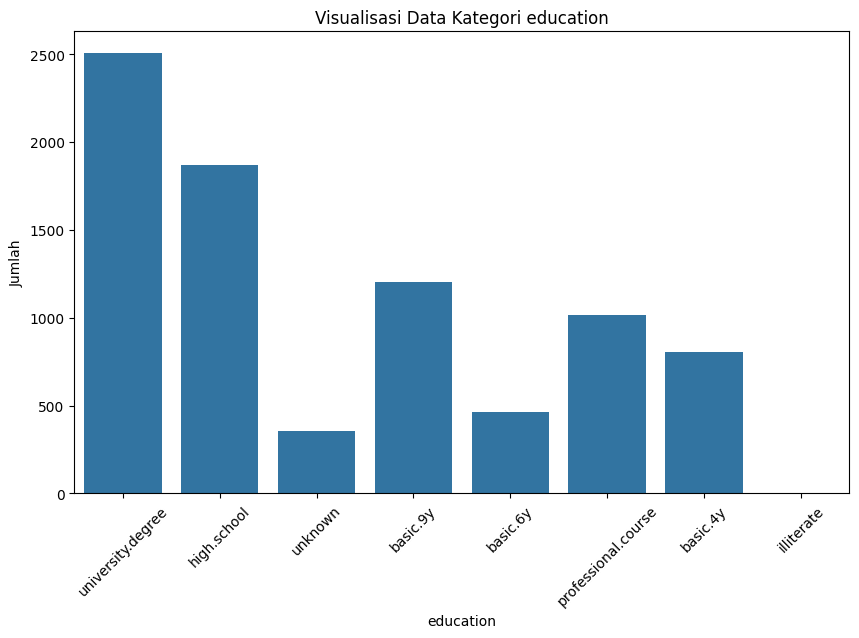

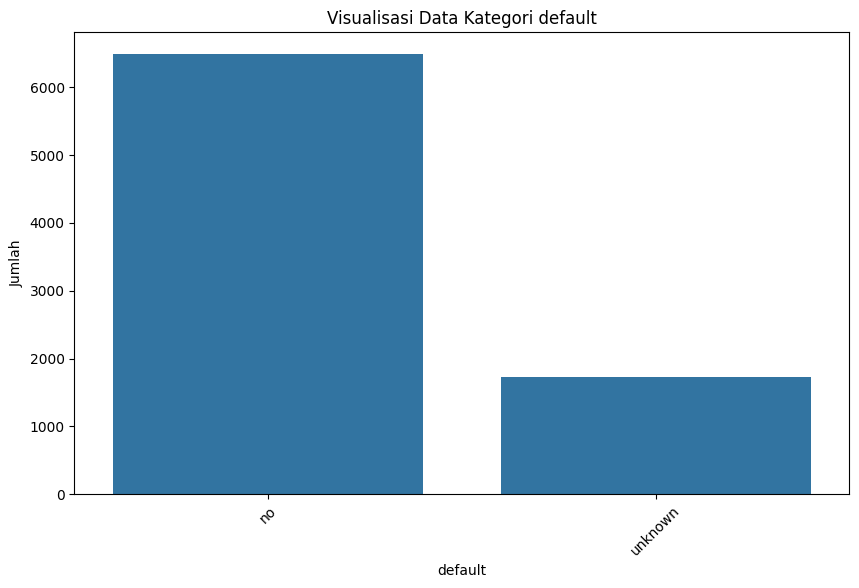

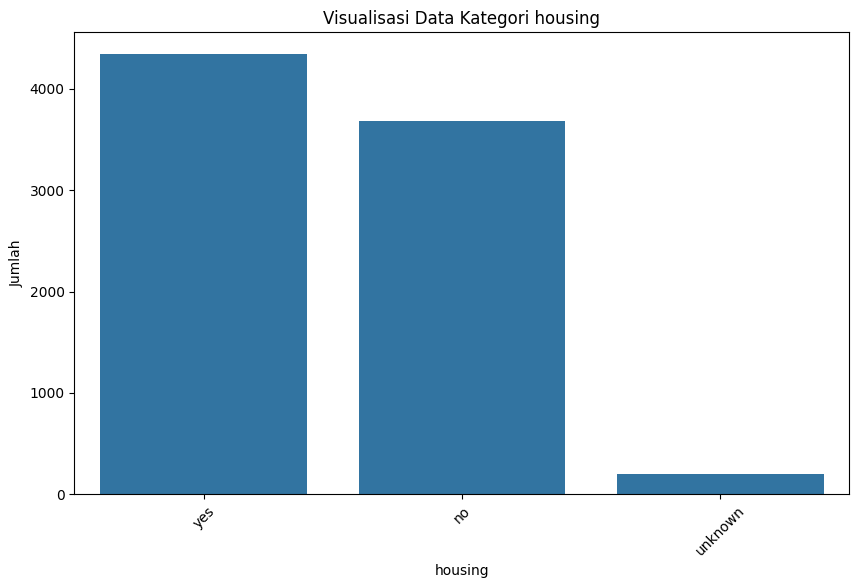

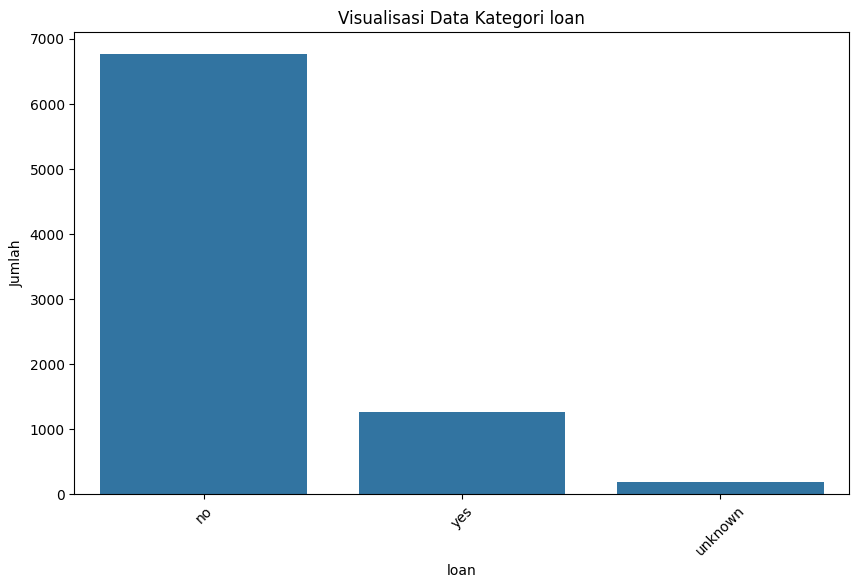

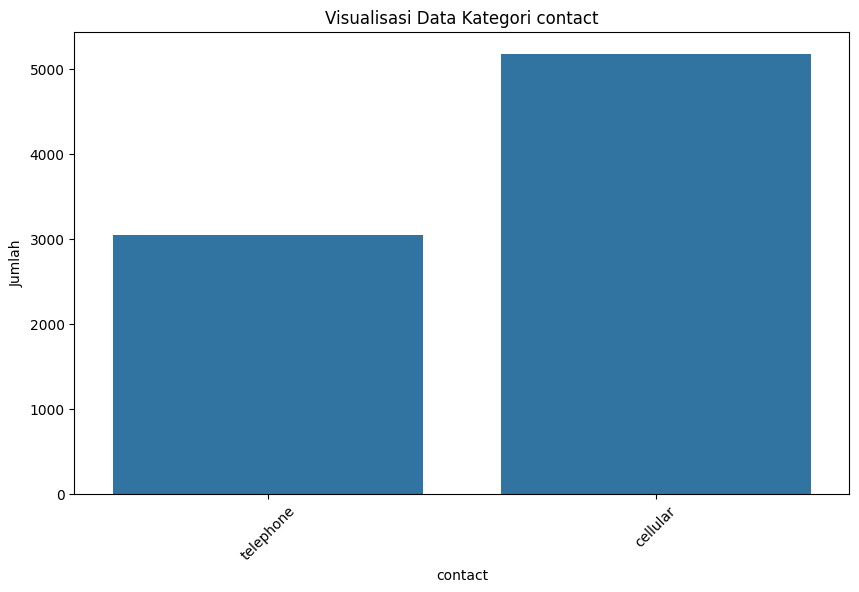

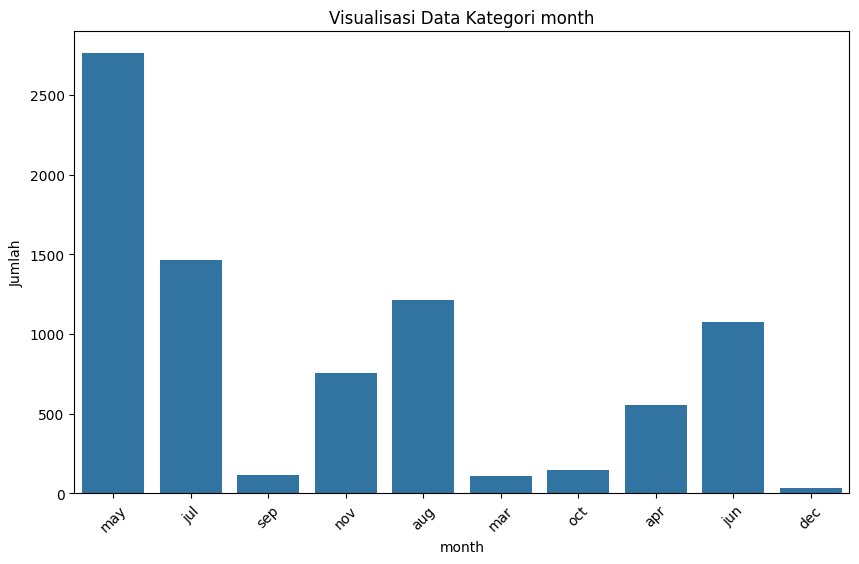

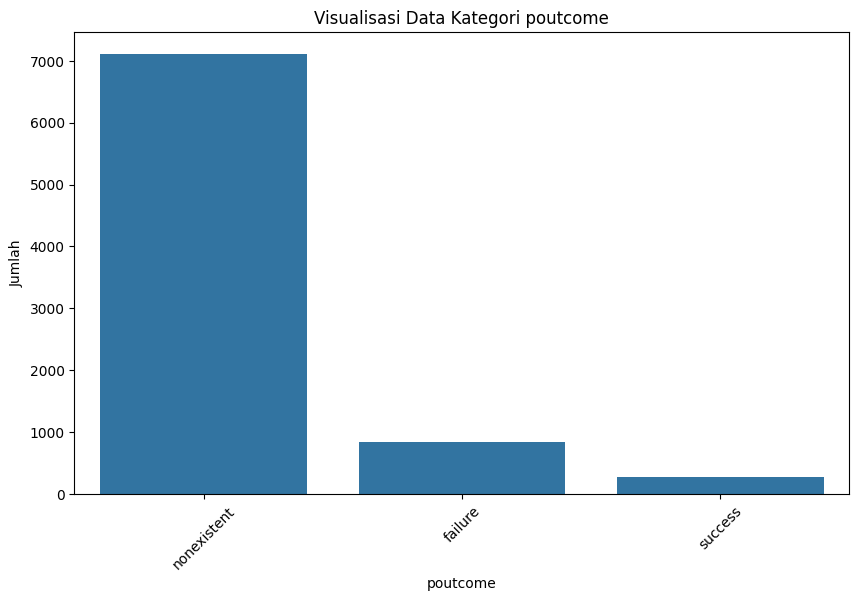

In [ ]:
for Kolom in Kolom_Kategori:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=Kolom, data=data)
  plt.title(f'Visualisasi Data Kategori {Kolom}')
  plt.xlabel(Kolom)
  plt.ylabel('Jumlah')
  plt.xticks(rotation=45)
  plt.show()

Visualisasi Data Numerik

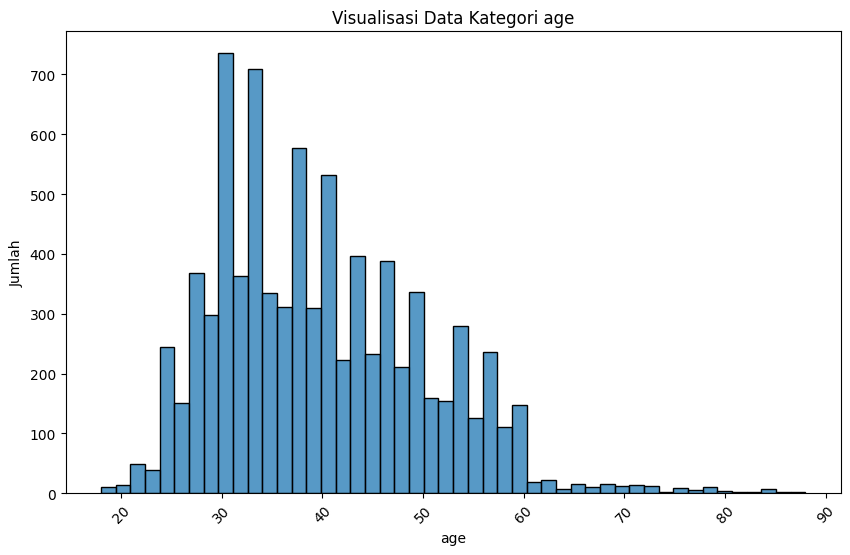

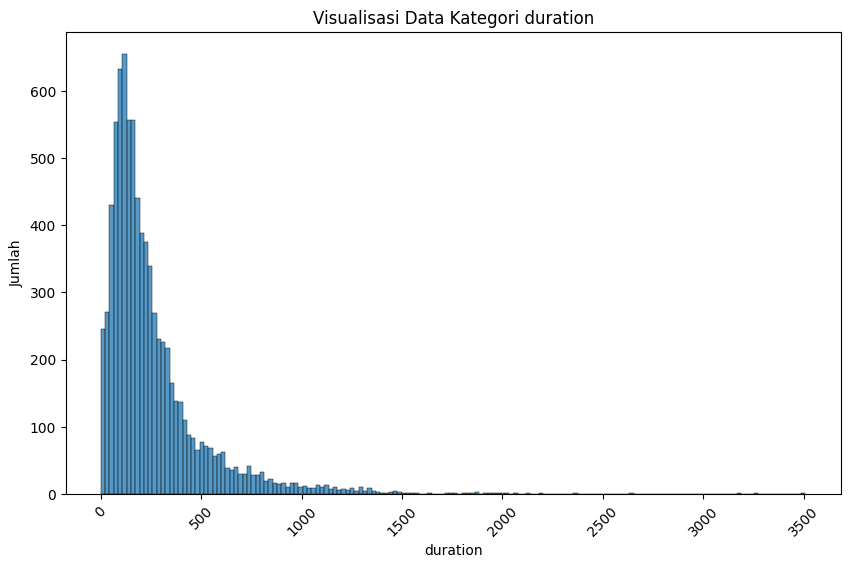

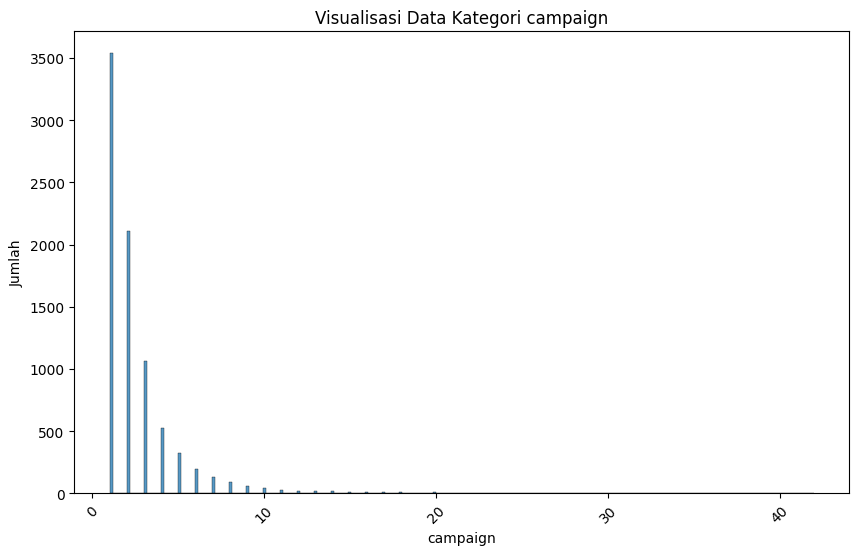

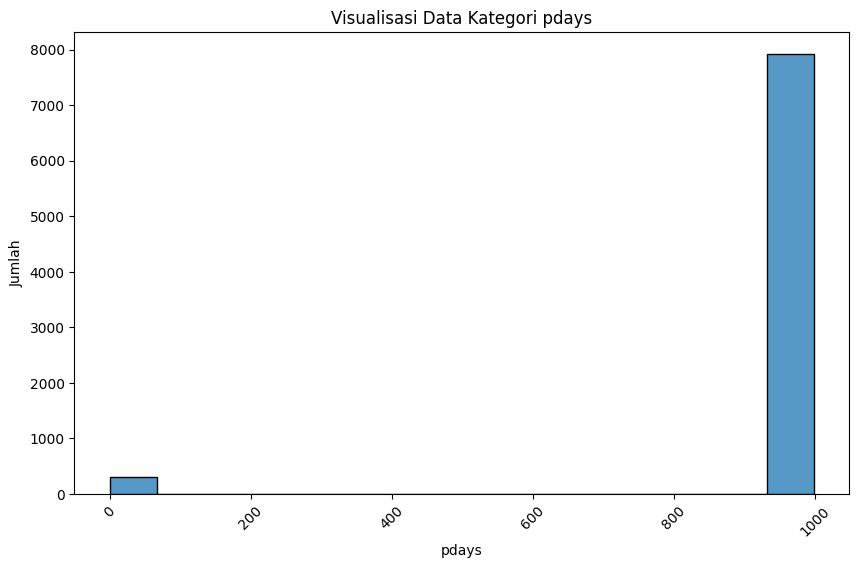

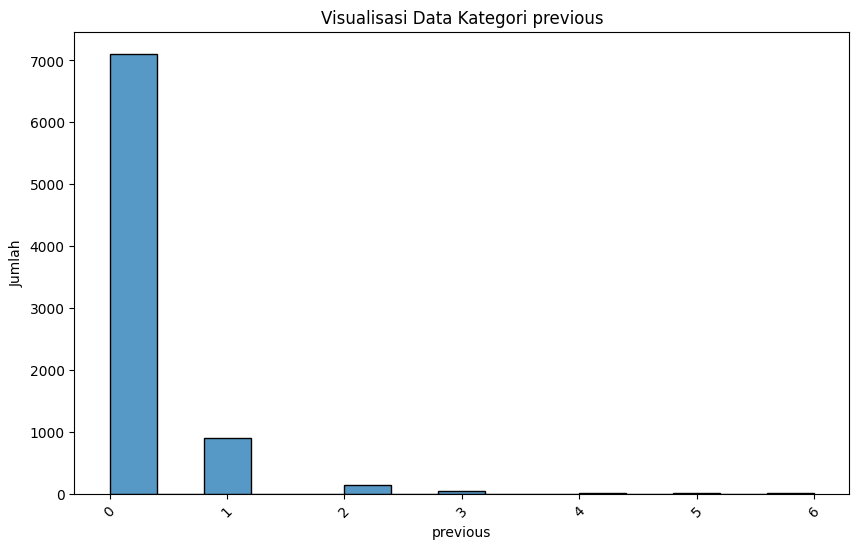

In [ ]:
Kolom_Numerik = ['age', 'duration', 'campaign', 'pdays', 'previous']
for Kolom in Kolom_Numerik:
  plt.figure(figsize=(10, 6))
  sns.histplot(data[Kolom])
  plt.title(f'Visualisasi Data Kategori {Kolom}')
  plt.xlabel(Kolom)
  plt.ylabel('Jumlah')
  plt.xticks(rotation=45)
  plt.show()


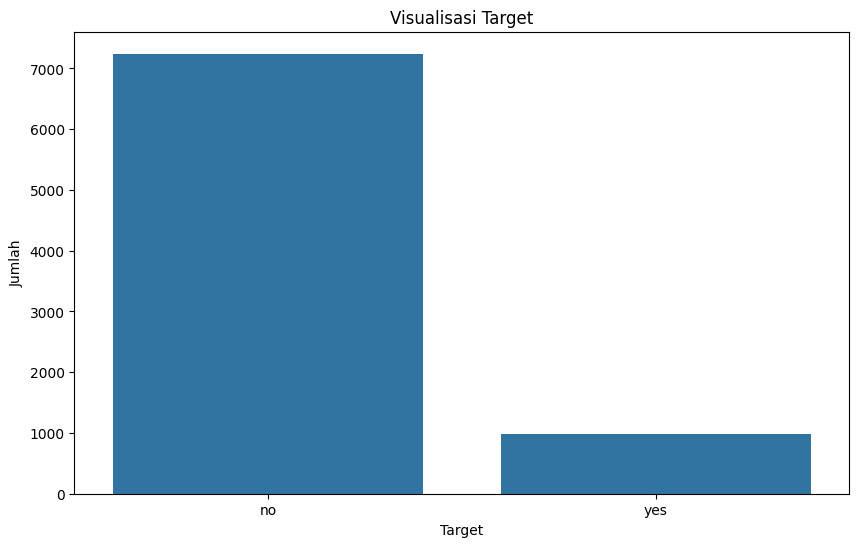

In [ ]:
# Target
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=data)
plt.title('Visualisasi Target')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data['y'].value_counts()

y
no     7243
yes     978
Name: count, dtype: int64

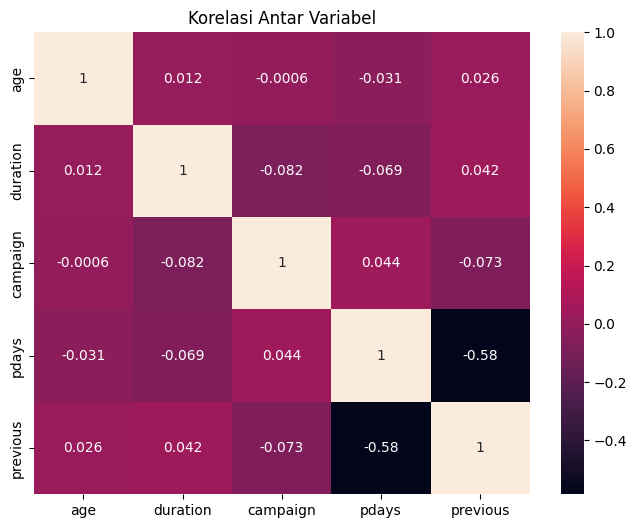

In [ ]:
Korelasi = data[Kolom_Numerik].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(Korelasi, annot=True)
plt.title('Korelasi Antar Variabel')
plt.show()

Split Data

In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [ ]:
x = data.drop(['y'], axis=1)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6576, 15)
(1645, 15)
(6576,)
(1645,)


In [ ]:
# Normalisasi fitur numerik
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
with open('Scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
#Model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1455
           1       0.61      0.38      0.47       190

    accuracy                           0.90      1645
   macro avg       0.76      0.67      0.71      1645
weighted avg       0.89      0.90      0.89      1645



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1455
           1       0.66      0.33      0.44       190

    accuracy                           0.90      1645
   macro avg       0.79      0.65      0.69      1645
weighted avg       0.89      0.90      0.89      1645



In [ ]:
# Save the best model
best_model = rf_model if rf_model.score(x_test, y_test) > lr_model.score(x_test, y_test) else lr_model
print("Best Model:", type(best_model).__name__)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best Model: LogisticRegression
